In [1]:
import collocode
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import iv, kv

In [2]:
solver0 = collocode.CollocationODEFixedStepSolver(n=10, chtype=1)

In [3]:
solver = collocode.CollocationODESolver(n=4, chtype=1, adapative=True)

In [4]:
def bessel_ode(x):
    return x, 1, -1

In [5]:
sol = solver(bessel_ode, [1, 1], domain = [0, 1])

In [6]:
sol.coef.shape

(10,)

In [7]:
np.log10(sol.error)

-16.41511841475372

In [8]:
def iv_fit(x, v):
    return iv(v, 2.*np.sqrt((x+1)/2.))

def iv_fit_2(x, v):
    return iv(v, 2.*np.sqrt(x))

In [9]:
interp = collocode.CollocationAlgebra(6)

In [10]:
sol2 = interp(iv_fit_2, args=(0,), domain = [0, 1])

In [3]:
import spherical

In [47]:
wigner = spherical.Wigner(100)

In [48]:
import quaternionic

In [49]:
R = quaternionic.array.from_spherical_coordinates(0.5, 0.)

In [52]:
%timeit wigner.sYlm(-2, R)[wigner.Yindex(100, 2)]

1.56 ms ± 68.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


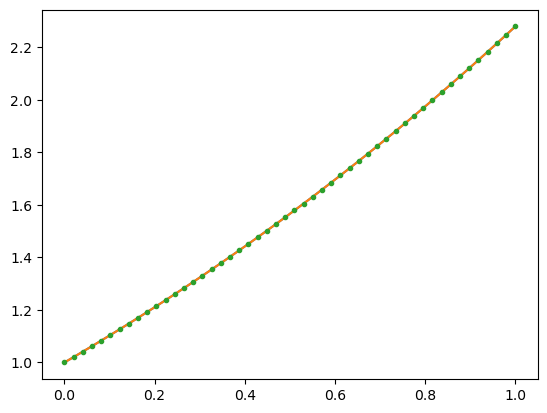

In [11]:
plt.plot(np.linspace(0, 1), sol(np.linspace(0, 1)))
plt.plot(np.linspace(0, 1), sol2(np.linspace(0, 1)))
plt.plot(np.linspace(0, 1), iv(0, 2*np.sqrt(np.linspace(0, 1))), '.')
# plt.plot(np.linspace(0, 1), kv(0, 2*np.sqrt(np.linspace(0, 1))), '.')
plt.show()

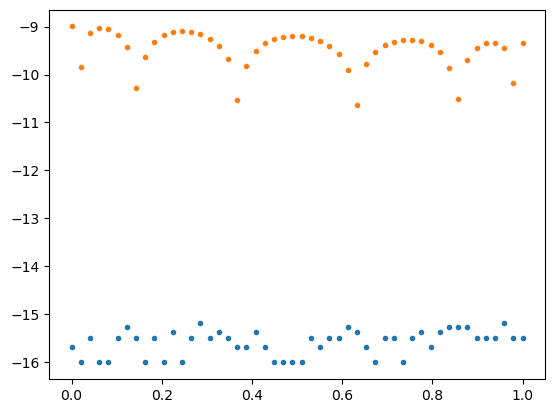

In [12]:
plt.plot(np.linspace(0, 1), np.log10(1e-16 + np.abs(1-sol(np.linspace(0, 1))/iv(0, 2*np.sqrt(np.linspace(0, 1))))), '.')
plt.plot(np.linspace(0, 1), np.log10(1e-16 + np.abs(1-sol2(np.linspace(0, 1))/iv(0, 2*np.sqrt(np.linspace(0, 1))))), '.')
plt.show()

In [1]:
import collocode
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ex_ode(x):
    return [(1-x**2)**2, -2*(1-x**2)*(2 - x - 2.*x**2), 2*(1+x**2)]
def ex_sol(x):
    return 0.5*np.exp(-4.*(1-x))*(1 - x**2)
def ex_sol_deriv(x):
    return np.exp(-4.*(1-x))*(2 - x - 2*x**2)
def ex_sol_deriv2(x):
    return np.exp(-4.*(1-x))*(7 - 8*x - 8*x**2)
def ex_sol_deriv3(x):
    return np.exp(-4.*(1-x))*(20 - 3*16*x - 2*16*x**2)

In [9]:
solver3 = collocode.CollocationODEFixedStepSolver(n=24, chtype=1)
solver4 = collocode.CollocationODEMultiDomainFixedStepSolver(n=10, chtype=1)
solver5 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=16, chtype=1)

In [12]:
solex = solver3(ex_ode, [0, -1], domain = [1,-1])
solex2 = solver4(ex_ode, [0, -1], domain = [1, -1], subdomains = 4, tol = 1e-14)
solex3 = solver5(ex_ode, [0, -1], domain = [1, -1], subdomains = [1, 0.98, 0.75, 0.5, 0., -0.6, -1.])

In [13]:
solex3.domains

[1, 0.98, 0.75, 0.5, 0.0, -0.6, -1.0]

In [14]:
error_array = []
for cheby in solex2.chebylist:
    error_array.append(cheby.error)

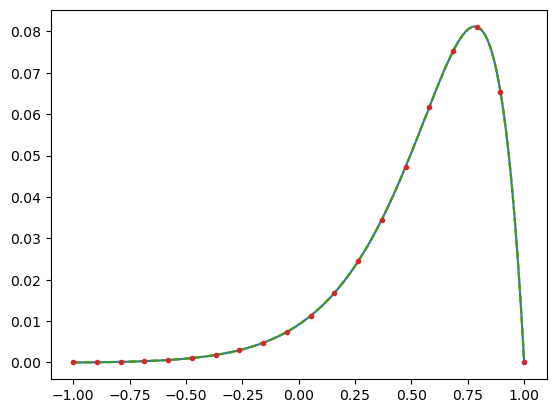

In [16]:
xvals = np.linspace(-1, 1, 200)
xvals_sub = np.linspace(-1, 1, 20)
plt.plot(xvals, solex(xvals))
plt.plot(xvals, solex2(xvals), '--')
plt.plot(xvals, solex3(xvals), '--')
plt.plot(xvals_sub, ex_sol(xvals_sub), '.')
plt.show()

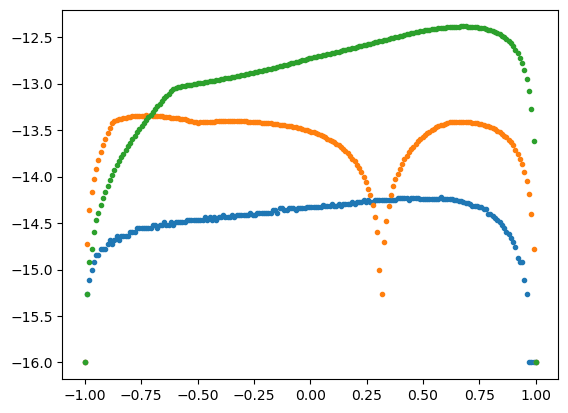

In [17]:
# plt.plot(solex2.domains[:-1], np.log10(error_array), '.')
plt.plot(xvals, np.log10(1e-16 + np.abs(1-(solex(xvals) + 1.)/(ex_sol(xvals)+ 1.))), '.')
plt.plot(xvals, np.log10(1e-16 + np.abs(1-(solex2(xvals) + 1.)/(ex_sol(xvals)+ 1.))), '.')
plt.plot(xvals, np.log10(1e-16 + np.abs(1-(solex3(xvals) + 1.)/(ex_sol(xvals)+ 1.))), '.')

In [182]:
sol1 = solver3(ex_ode, [0, -1], domain = [1, 0.5])
sol11 = solver3(ex_ode, [1, 0], domain = [0.5, 0.])
sol21 = solver3(ex_ode, [0, 1], domain = [0.5, 0.])

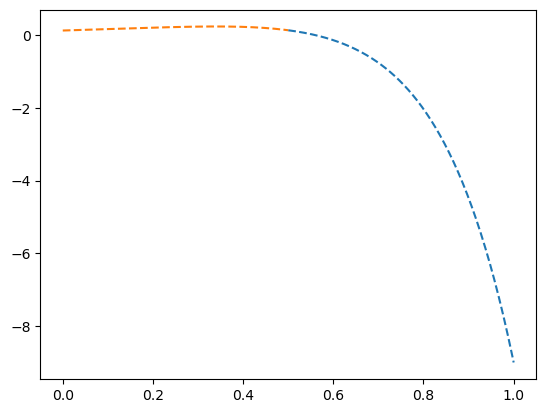

In [186]:
xvals0 = np.linspace(0.5, 1, 200)
plt.plot(xvals0, sol1.deriv().deriv()(xvals0), '--')
xvals1 = np.linspace(0., 0.5, 200)
plt.plot(xvals1, sol1(0.5)*sol11.deriv().deriv()(xvals1) + (sol1.deriv()(0.5))*sol21.deriv().deriv()(xvals1), '--')
plt.show()

In [1]:
import collocode
import numpy as np
import matplotlib.pyplot as plt
import teuk
import swsh

In [2]:
teuksolver = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=32, chtype=1)
teuksolver2 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=64, chtype=1)
teuksolver3 = collocode.CollocationODEMultiDomainFixedStepSolver(n=128, chtype=1)
teuksolver4 = collocode.CollocationODEFixedStepSolver(n=1999, chtype=1)

In [3]:
s = -2
a = 0.9
l = 80
m = 2
omega = m*0.11235955
lam = swsh.swsh_eigenvalue(s, l, m, a*omega)

kappa = np.sqrt(1 - a**2)
ma = m*a

y0 = 1
dy0 = -teuk.u_hbl(0, kappa, s, lam, ma, omega)*y0/teuk.q_hbl(0, kappa, s, ma, omega)
Psi = teuksolver(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 0.25], subdomains=64)
Psi2 = teuksolver2(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 0.25], subdomains=400)
Psi3 = teuksolver3(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 0.25], subdomains=24, tol = 1e-11)
Psi4 = teuksolver2(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 0.25], subdomains=64)
Psi5 = teuksolver4(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 0.25])

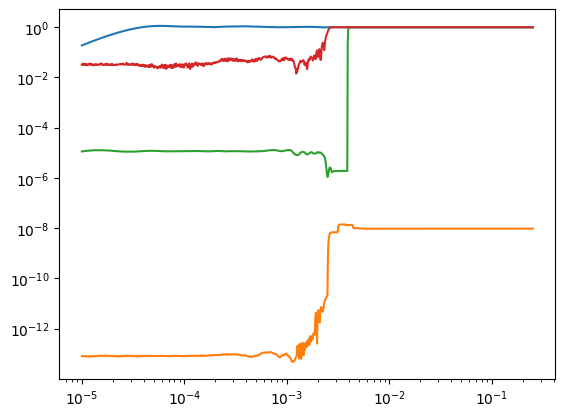

In [4]:
sigmas = np.logspace(np.log10(1e-5), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(1 - Psi(sigmas)/Psi2(sigmas)))
plt.plot(sigmas, np.abs(1 - Psi3(sigmas)/Psi2(sigmas)))
plt.plot(sigmas, np.abs(1 - Psi4(sigmas)/Psi2(sigmas)))
plt.plot(sigmas, np.abs(1 - Psi5(sigmas)/Psi2(sigmas)))
plt.yscale('log')
plt.xscale('log')
plt.show()

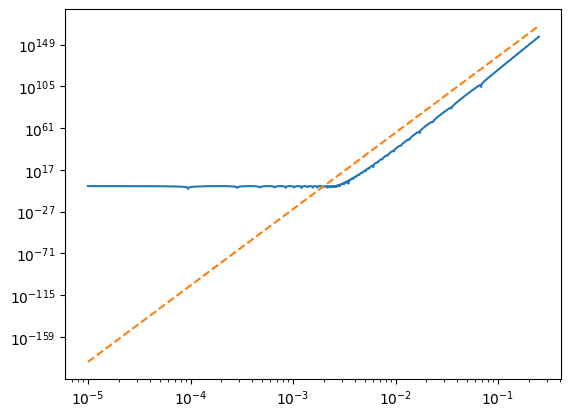

In [5]:
sigmas = np.logspace(np.log10(1e-5), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(Psi3(sigmas).real))
plt.plot(sigmas, (500*sigmas)**np.sqrt(lam), '--')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [6]:
transformer = collocode.CollocationAlgebra(100)

In [7]:
PsiInt = transformer(Psi3, domain = Psi3.domains[[0,-1]])

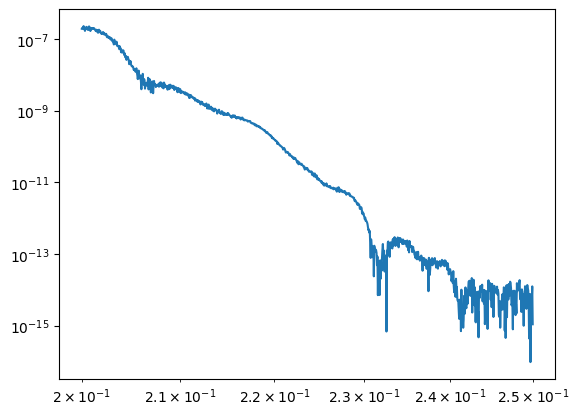

In [8]:
sigmas = np.logspace(np.log10(0.2), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(1-Psi3(sigmas)/PsiInt(sigmas)))
plt.yscale('log')
plt.xscale('log')
plt.show()

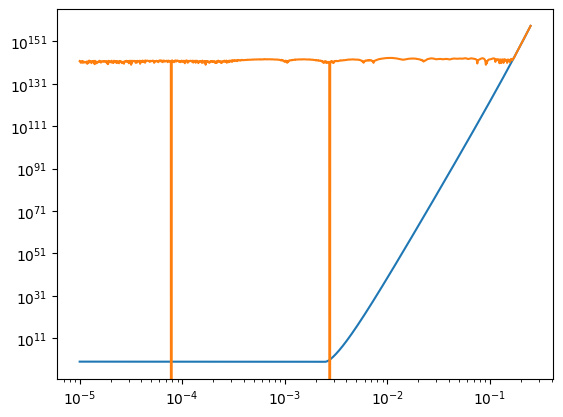

In [9]:
sigmas = np.logspace(np.log10(1e-5), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(Psi3(sigmas)))
plt.plot(sigmas, np.abs(PsiInt(sigmas)))
plt.yscale('log')
plt.xscale('log')
plt.show()

In [10]:
import kerrgeopy as kg

In [11]:
geo = kg.StableOrbit(0.9, 4., 0., 1.)

### Static modes $m = \omega = 0$

In [50]:
from teuk import HyperboloidalTeukolsky, Delta_sigma
import numpy as np
import matplotlib.pyplot as plt

In [107]:
s = -2
a = 0.9
l = 80
m = 0
omega = m*0.11235955

hbl = HyperboloidalTeukolsky(a, s, l, m, omega, domains=[[0, 0.25], [1, 0.25]])
hbl2 = HyperboloidalTeukolsky(a, -s, l, m, omega, domains=[[0, 0.25], [1, 0.25]])
# hbl.reduce(transformer)

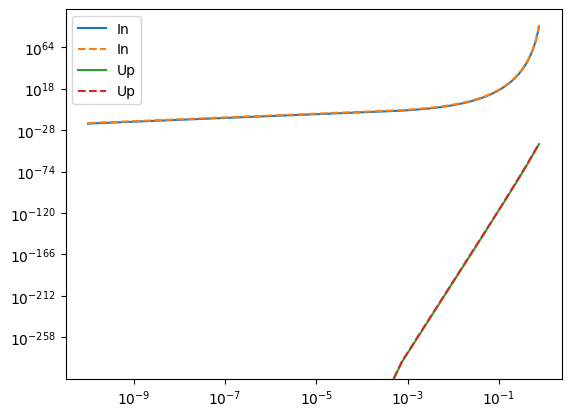

In [108]:
xvalsIn = np.linspace(hbl.psi["In"].domain[0]-1e-10, hbl.psi["In"].domain[1], 1000)[:]
xvalsUp = np.linspace(hbl.psi["Up"].domain[0]+1e-10, hbl.psi["Up"].domain[1], 1000)[:]
Rin0 = hbl.Z_sigma(xvalsIn)*hbl.psi['In'](xvalsIn)
Rin0M = hbl2.Z_sigma(xvalsIn)*hbl2.psi['In'](xvalsIn)/(Delta_sigma(xvalsIn, hbl2.kappa))**(s)
Rup0 = hbl.Z_sigma(xvalsUp)*hbl.psi['Up'](xvalsUp)
Rup0M = hbl2.Z_sigma(xvalsUp)*hbl2.psi['Up'](xvalsUp)/(Delta_sigma(xvalsUp, hbl2.kappa))**(s)
plt.plot(1-xvalsIn, np.abs(Rin0), label = 'In')
plt.plot(1-xvalsIn, np.abs(Rin0M), '--', label = 'In')
plt.plot(1-xvalsIn, np.abs(Rup0), label = 'Up')
plt.plot(1-xvalsIn, np.abs(Rup0M), '--', label = 'Up')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

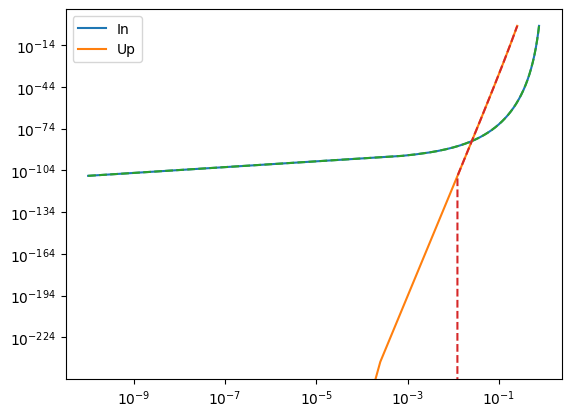

In [45]:
from scipy.special import lpmn, lqmn

xvalsIn = np.linspace(hbl.psi["In"].domain[0]-1e-10, hbl.psi["In"].domain[1], 1000)[:]
xvalsUp = np.linspace(hbl.psi["Up"].domain[0]+1e-10, hbl.psi["Up"].domain[1], 1000)[:]
Rin0 = hbl.Z_sigma(xvalsIn)*hbl.psi['In'](xvalsIn)
Rin0M = hbl2.Z_sigma(xvalsIn)*hbl2.psi['In'](xvalsIn)
Rup0 = hbl.Z_sigma(xvalsUp)*hbl.psi['Up'](xvalsUp)
RinComp = np.array([(z*(1+z))**(-s/2)*lpmn(s, l, 1 + 2*z)[0][np.abs(s), l] for z in 1/xvalsIn-1])
RupComp = np.array([(z*(1+z))**(-s/2)*lqmn(np.abs(s), l, 1 + 2*z)[0][np.abs(s), l] for z in 1/xvalsUp-1])
plt.plot(1-xvalsIn, np.abs(Rin0/Rin0[-1]), label = 'In')
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1]), label = 'Up')
plt.plot(1-xvalsIn, np.abs(RinComp/RinComp[-1]), '--')
plt.plot(xvalsUp, np.abs(RupComp/RupComp[-1]), '--')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

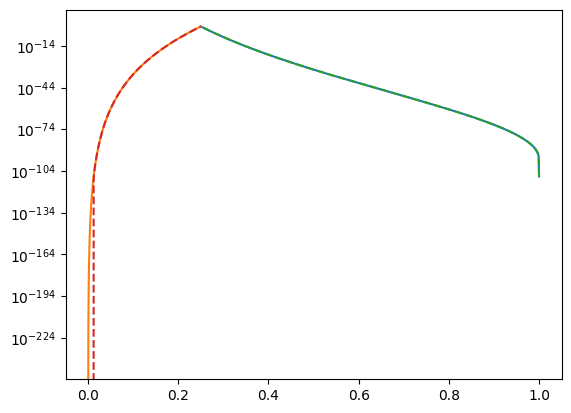

In [11]:
plt.plot(xvalsIn, np.abs(Rin0/Rin0[-1]))
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1]))
plt.plot(xvalsIn, np.abs(RinComp/RinComp[-1]), '--')
plt.plot(xvalsUp, np.abs(RupComp/RupComp[-1]), '--')
plt.yscale('log')
plt.show()

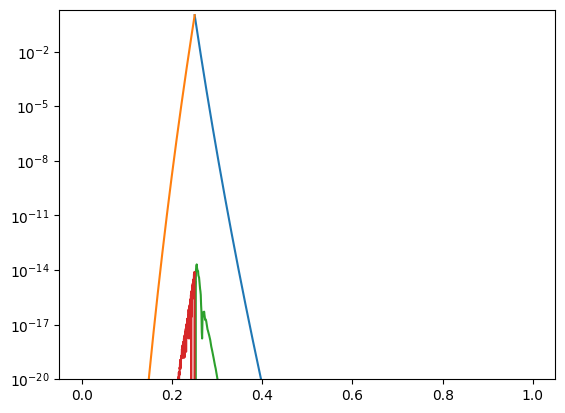

In [12]:
plt.plot(xvalsIn, np.abs(Rin0/Rin0[-1]))
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1]))
# plt.plot(xvalsIn, np.abs(1-Rin0/Rin0[-1]/(RinComp/RinComp[-1])), '--')
# plt.plot(xvalsUp, np.abs(1-Rup0/Rup0[-1]/(RupComp/RupComp[-1])), '--')
plt.plot(xvalsIn, np.abs(Rin0/Rin0[-1] - (RinComp/RinComp[-1])))
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1] - (RupComp/RupComp[-1])))
plt.yscale('log')
plt.ylim([1e-20, 2])
plt.show()

### Non-static modes

In [13]:
from teuk import HyperboloidalTeukolsky
import numpy as np
import matplotlib.pyplot as plt

In [14]:
s = 2
a = 0.9
l = 12
m = 12
omega = m*0.11235955

hbl = HyperboloidalTeukolsky(a, s, l, m, omega, domains=[[0, 0.25], [1, 0.25]])
# hbl.reduce(transformer)

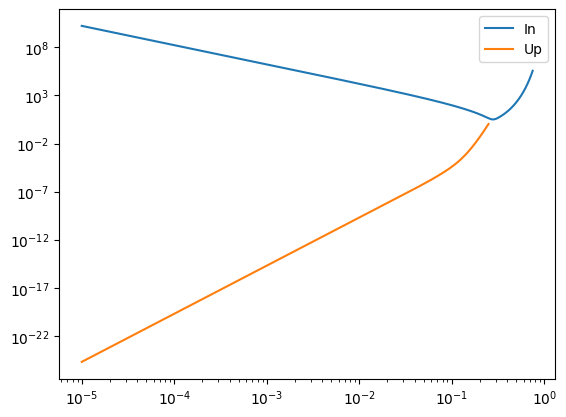

In [15]:
xvalsIn = np.linspace(hbl.psi["In"].domain[0]-1e-5, hbl.psi["In"].domain[1], 1000)[:]
xvalsUp = np.linspace(hbl.psi["Up"].domain[0]+1e-5, hbl.psi["Up"].domain[1], 1000)[:]
Rin0 = hbl.Z_sigma(xvalsIn)*hbl.psi['In'](xvalsIn)
Rup0 = hbl.Z_sigma(xvalsUp)*hbl.psi['Up'](xvalsUp)
plt.plot(1-xvalsIn, np.abs(Rin0), label = 'In')
plt.plot(xvalsUp, np.abs(Rup0), label = 'Up')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

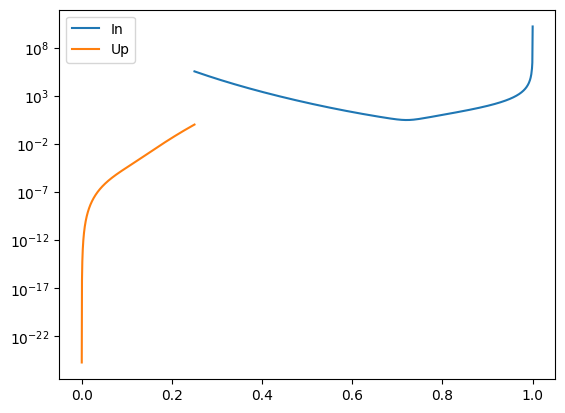

In [16]:
plt.plot(xvalsIn, np.abs(Rin0), label = 'In')
plt.plot(xvalsUp, np.abs(Rup0), label = 'Up')
plt.yscale('log')
plt.legend()
plt.show()

In [1]:
from source import MiniGeo, TeukolskyPointParticleMode
from teuk import sigma_r, r_sigma, sigma_r_deriv_sigma
import numpy as np
import matplotlib.pyplot as plt
import collocode

ImportError: cannot import name 'MiniGeo' from 'source' (/Users/znasipak/Documents/Projects/HyperboloidalTeuk/hbl-teukolsky/source.py)

In [2]:
teuksolver = collocode.CollocationODEMultiDomainFixedStepSolver(n=32, chtype=1)
teuksolver_kwargs = {"subdomains": 150, "tol": 1e-13, "spacing": 'arcsinh7'}

teuksolver2 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=64, chtype=1)
teuksolver_kwargs2 = {"subdomains": 400, "spacing": 'arcsinh'}

In [3]:
from pybhpt.teuk import TeukolskyMode
from pybhpt.geo import KerrGeodesic

In [4]:
orbit2 = KerrGeodesic(0.9, 20., 0., 1, nsamples = 2**2)
orbit = MiniGeo(0.9, 20., 0., 1)

In [5]:
teukStatic = TeukolskyPointParticleMode(-2, 70, 2, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})
teukStaticComp = TeukolskyPointParticleMode(-2, 70, 0, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})

In [21]:
teukStatic

NameError: name 'teukStatic' is not defined

In [6]:
%timeit teukStatic = TeukolskyPointParticleMode(-2, 70, 2, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})

361 ms ± 25.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
teukZN = TeukolskyMode(-2, 60, 60, 0, 0, orbit2)
teukZN.solve(orbit2)
teuk60 = TeukolskyPointParticleMode(-2, 60, 60, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})
teuk602 = TeukolskyPointParticleMode(-2, 60, 60, 0, 0, orbit, solver = teuksolver2, solver_kwargs = teuksolver_kwargs2, integrate_kwargs = {"nsamples": 2**2})

In [9]:
teuktest = TeukolskyPointParticleMode(-2, 80, -80, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})

In [10]:
from spheroidal import Ylm

In [12]:
# %%timeit
teuksolver_kwargs = {"subdomains": 140, "tol": 1e-13, "spacing": 'arcsinh7'}
teukList = []
teuk0 = TeukolskyPointParticleMode(-2, 80, 1, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})
teukList.append(teuk0)
teuksolver2 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=32, chtype=1)
teuksolver_kwargs2 = {"subdomains": teuk0.domains}
for l in range(40, 1, -1):
    print(l)
    for m in range(-l, l+1):
        teukList.append(TeukolskyPointParticleMode(-2, l, m, 0, 0, orbit, solver = teuksolver2, solver_kwargs = teuksolver_kwargs2, integrate_kwargs = {"nsamples": 2**2}))

40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2


In [10]:
teukZN.amplitude('Up'), teuk60.amplitude["Up"], teuk602.amplitude["Up"], teukZN.amplitude('In'), teuk60.amplitude["In"]

((1.4114860893801364e-35+1.9460634686292824e-34j),
 (1.4114860880571403e-35+1.946063468587713e-34j),
 (1.4114860909185536e-35+1.946063469576351e-34j),
 (-2.618915308602806e-72+4.47601385712135e-73j),
 (-2.618915308601996e-72+4.476013857125176e-73j))

In [13]:
sp = sigma_r(orbit.p, teuk60.kappa)
print(1-teukZN.homogeneousradialsolution('Up', 0)/teuk60.homogeneousradialsolution('Up', sp))
print(1-teukZN.homogeneousradialsolution('In', 0)/teuk60.homogeneousradialsolution('In', sp))
print(1-teukZN.homogeneousradialderivative('Up', 0)/teuk60.homogeneousradialderivative('Up', sp)/sigma_r_deriv_sigma(sp, teuk60.kappa))
print(1-teukZN.homogeneousradialderivative('In', 0)/teuk60.homogeneousradialderivative('In', sp)/sigma_r_deriv_sigma(sp, teuk60.kappa))

(2.6160296151545026e-11-6.608752443634374e-11j)
(2.822186928597148e-13+1.9270722386347414e-13j)
(2.6160740240754876e-11-6.608788228711248e-11j)
(2.8532731732866523e-13+1.9445101287320373e-13j)


# Generator Rewrite

In [1]:
import collocode
from mode import TeukolskyPointParticleModeGenerator
from geo import MiniGeo

In [2]:
orbit = MiniGeo(0.9, 20., 0., 1)

In [3]:
solver = collocode.CollocationODEMultiDomainFixedStepSolver(n=32, chtype=1)
solver_kwargs = {"subdomains": 150, "tol": 1e-13, "spacing": 'arcsinh7'}
teuk_gen = TeukolskyPointParticleModeGenerator(orbit, solver, solver_kwargs)

In [4]:
teuk = teuk_gen(-2, 2, 2, 0, 0)

In [23]:
teuk.Rslm["In"](teuk.Rslm.sigma_r(teuk.Rslm.horizon + 0.001), slicing = "time")

(0.42857391582842724-0.76034854942449j)

# Scratch

In [14]:
bc_test = 'Up'
sigmasUP = np.linspace(*teuk.Rslm.psi[bc_test].domain, 1000)
sigmas = sigmasUP
combo2plus60_UP = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas) + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times60_UP = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times2_UP = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)

bc_test = 'In'
sigmasIN = np.linspace(*teuk.Rslm.psi[bc_test].domain, 1000)
sigmas = sigmasIN
combo2plus60_IN = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas) + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times60_IN = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times2_IN = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)


teuk.Rslm.reduce(n=120)
teuk60.Rslm.reduce(n=120)

bc_test = 'Up'
sigmas = sigmasUP
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test] + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2plus60_UP_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2times60_UP_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]
combo2times2_UP_comp = test(sigmas)

bc_test = 'In'
sigmas = sigmasIN
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test] + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2plus60_IN_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2times60_IN_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]
combo2times2_IN_comp = test(sigmas)

NameError: name 'teuk' is not defined

/Users/znasipak/Documents/Projects/HyperboloidalTeuk/hbl-teukolsky/teuk.py:50: RuntimeWarning: divide by zero encountered in divide
  return 1. - kappa + 2.*kappa/sigma


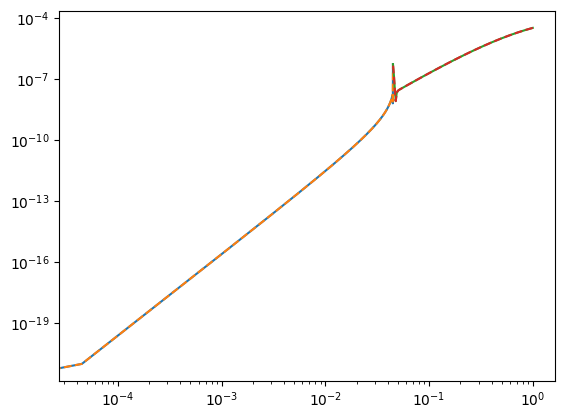

In [136]:
rhoUP = r_sigma(sigmasUP, teuk.kappa)**(-4)
rhoIN = r_sigma(sigmasIN, teuk.kappa)**(-4)
plt.plot(sigmasUP, rhoUP*np.abs(combo2plus60_IN))
plt.plot(sigmasUP, rhoUP*np.abs(combo2plus60_IN_comp), '--')
plt.plot(sigmasIN, rhoIN*np.abs(combo2plus60_IN))
plt.plot(sigmasIN, rhoIN*np.abs(combo2plus60_IN_comp), '--')
plt.yscale('log')
plt.xscale('log')
plt.show()

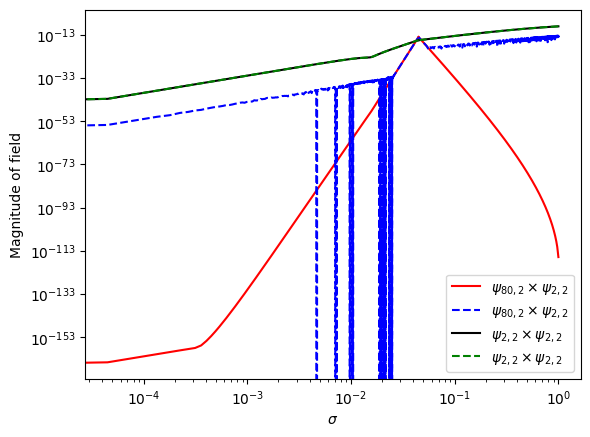

In [137]:
rhoUP = r_sigma(sigmasUP, teuk.kappa)**(-4)
rhoIN = r_sigma(sigmasIN, teuk.kappa)**(-4)
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times60_UP), 'r-', label = "$\psi_{80,2} \\times \psi_{2,2}$")
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times60_UP_comp), 'b--', label = "$\psi_{80,2} \\times \psi_{2,2}$")
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times60_IN), 'r-')
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times60_IN_comp), 'b--')
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times2_IN), '-', color = 'black', label = "$\psi_{2,2} \\times \psi_{2,2}$")
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times2_IN_comp), '--', color = 'green', label = "$\psi_{2,2} \\times \psi_{2,2}$")
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times2_UP), '-', color = 'black')
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times2_UP_comp), '--', color = 'green')
plt.yscale('log')
plt.xscale('log')
# plt.ylim([1e-36,1e3])
plt.legend()
plt.ylabel("Magnitude of field")
plt.xlabel("$\sigma$")
plt.show()